In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_relief as sr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

**Analyze Data**

In [19]:
df = pd.read_csv("Staphylococcus_aureus_Infection_Data.csv")
df.head

<bound method NDFrame.head of       AGE_GRP  ThirtyDay_Death  Charlson_WIC  Protein 1  Protein 2  Protein 3  \
0        5160                0             0   0.216912  -0.150886  -0.038081   
1        5160                0             2   0.000000  -0.701414  -0.354478   
2        7180                1             4   0.224415  -0.053709  -0.025547   
3        6170                0             5  -0.080960  -0.480949  -0.345807   
4        5160                0             1   0.013984  -0.350237  -0.163590   
...       ...              ...           ...        ...        ...        ...   
5542       10                0             0   0.191297  -0.282302  -0.086869   
5543     5160                0             0  -0.091525  -0.369944  -0.280567   
5544     6170                0             9   0.131185  -0.507178  -0.341122   
5545       10                0             0  -0.034182  -0.233550  -0.491791   
5546     5160                0             5   0.000000  -0.459694  -0.301578  

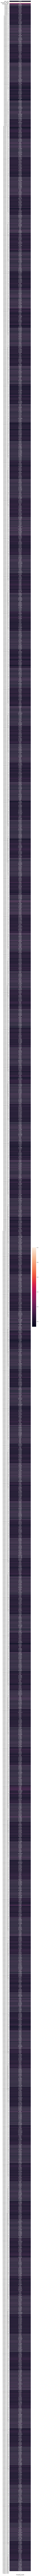

In [20]:
fig, axes = plt.subplots(figsize=(5,500))
sns.heatmap(data=df.corr()[['ThirtyDay_Death']], annot=True, linewidth=0.5, ax=axes)
plt.show()

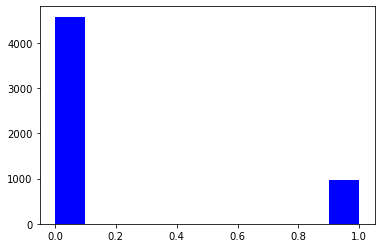

In [21]:
plt.hist(df[['ThirtyDay_Death']], color="b")
plt.show()

Observation: There is a large imbalance between true(1) and false(0) values. Oversampling can be used to correct.

**Preprocess Data**

In [52]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['ThirtyDay_Death'], axis=1)
y = df['ThirtyDay_Death'].values

y = pd.DataFrame(y)
ros=RandomOverSampler(random_state=42)
X_resamp, y_resamp=ros.fit_resample(X,y)
X_new = pd.concat([X,X_resamp])
y_new = pd.concat([y,y_resamp])

X_norm = MinMaxScaler().fit_transform(X_new)

In [53]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(f_classif, k=20)
X=select.fit_transform(X_norm,y_new)

C:\Users\tinkt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tinkt\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2093 2094] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\tinkt\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [42]:
r = sr.Relief(n_features=20) #select 20 best features
red_data = r.fit_transform(X_norm,y)
print(red_data)

[[0.71827057 0.         0.46881813 ... 0.60015738 0.41969967 0.39633098]
 [0.71827057 0.15384615 0.58892626 ... 0.66436666 0.61408384 0.35139277]
 [1.         0.30769231 0.53759774 ... 0.51961161 0.54450783 0.3459198 ]
 ...
 [0.85913529 0.69230769 0.37499649 ... 0.38091683 0.58422724 0.29493123]
 [0.         0.         0.55765299 ... 0.35930681 0.51324885 0.42909143]
 [0.71827057 0.38461538 0.39322223 ... 0.38356143 0.52767837 0.69275209]]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y_new, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

**Model 1: Basic Tree**

<AxesSubplot:>

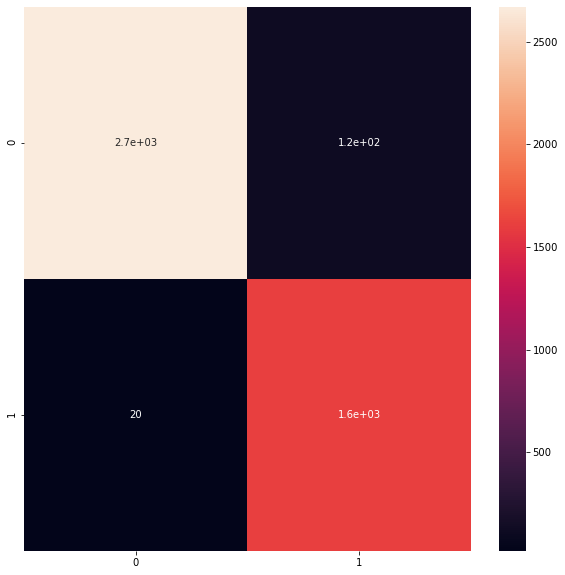

In [55]:
tree = DecisionTreeClassifier(random_state=7) #build model
tree = tree.fit(X_train, y_train) #train model
y_pred = tree.predict(X_test) #test model
y_pred_t = tree.predict(X_train)

#Correlation matrix
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=axes)

In [56]:
print("Training accuracy:", accuracy_score(y_train, y_pred_t))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Training accuracy: 1.0
Test accuracy: 0.968282736746715


**Model 2: Logistic Regression**

C:\Users\tinkt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tinkt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

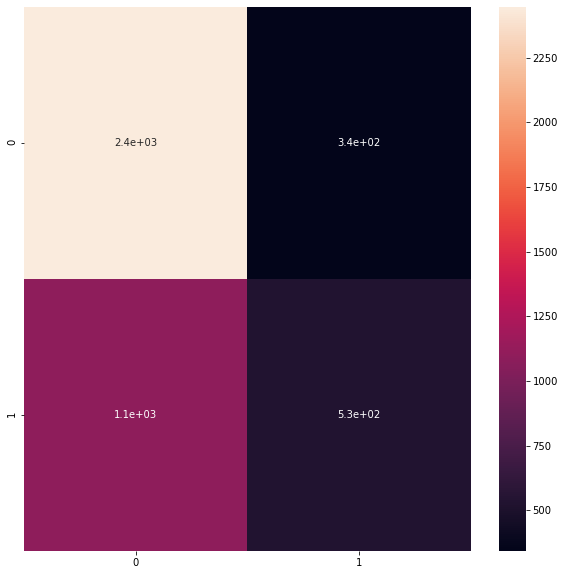

In [57]:
log_reg = LogisticRegression() #create model
log_reg.fit(X_train, y_train) #train model
y_pred = log_reg.predict(X_test) #test model
y_pred_t = log_reg.predict(X_train)

#correlation matrix
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=axes)

In [58]:
print("Training accuracy:", accuracy_score(y_train, y_pred_t))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Training accuracy: 0.6683500048557832
Test accuracy: 0.673538740371545


**Model 3: Neural Network**

C:\Users\tinkt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

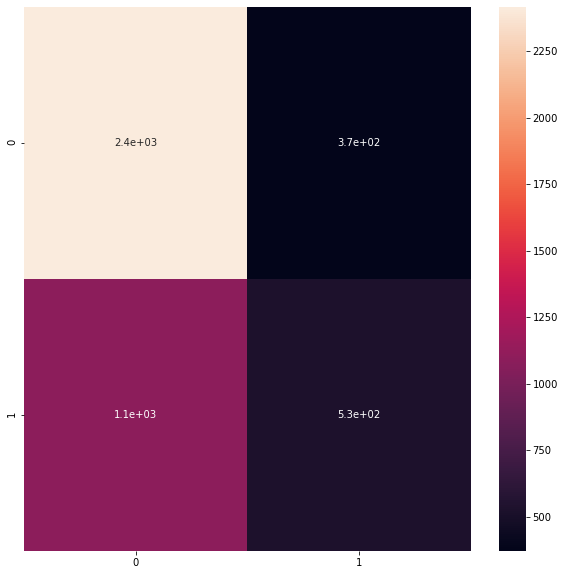

In [59]:
clf = MLPClassifier(hidden_layer_sizes=(3,), solver='sgd', max_iter=1000, random_state=1, validation_fraction=0.3).fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_t = clf.predict(X_train)

fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=axes)

In [60]:
print("Training accuracy:", accuracy_score(y_train, y_pred_t))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Training accuracy: 0.6622317179761096
Test accuracy: 0.6674218396012687
